In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

## 1. Clustering

### 1.1
- Load the usual Iris data restricted to the first two features, and ignore the class / target variable.

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X = iris[:,0:2]
X, _  = ml.rescale(X) # works much better on rescaled data - rescaling and centering the data may help speed up convergence

In [3]:
X.shape

(148, 2)

In [4]:
x1 = X[:,0]
x2 = X[:,1]

In [5]:
x1.shape, x2.shape

((148,), (148,))

### 1.1
- Plot the data and see for yourself how “clustered” you think it looks. Include the plot, and mention how many clusters you think exist (no wrong answer here)

[]

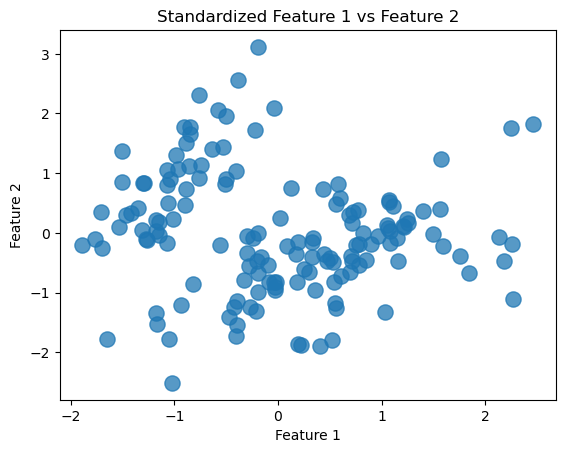

In [6]:
_, ax = plt.subplots()
ax.scatter(x1, x2, s=120, alpha=0.75)
ax.set_title('Standardized Feature 1 vs Feature 2')
ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
ax.plot()

There appears to be 3 - 5 clusters, in my opinion 5 clusters seems most likely.

### 1.2
- Run k-means on the data, for k = 2, k = 5, and k = 20.
- Try a few (at least 5 each) different initializations and check to see whether they find the same solution; if not, pick the one with the best score.
- For the chosen assignment for each k, include a plot with the data, colored by assignment, and the cluster centers.
- You can plot the points colored by assignments using ml.plotClassify2D(None,X,z) , where z are the resulting cluster assignments of the data. You will have to additionally plot the centers yourself.

Testing a helper function to generate k center indicies for k clusters

In [7]:
def gen_k_center_indicies(X, k, SEED=0):
        np.random.seed(SEED)
        center_indices = []
        while len(center_indices) != k:
                i = np.random.randint(0, X.shape[0])
                if i not in center_indices:
                        center_indices.append(i)
        return center_indices

In [8]:
test = gen_k_center_indicies(X=X, k=2)
test2 = gen_k_center_indicies(X=X, k=4)
test, test2

([47, 117], [47, 117, 67, 103])

In [9]:
K_parameters = [2, 5, 20]
K_models = []
for k in K_parameters:

    k_init_1_indicies = gen_k_center_indicies(X=X, k=k)
    k_init_1 = X[k_init_1_indicies, :]

    k_init_2_indicies = gen_k_center_indicies(X=X, k=k, SEED=1)
    k_init_2 = X[k_init_2_indicies, :]

    start_indicies = [k_init_1_indicies, k_init_2_indicies, 'random', 'farthest', 'k++']
    initializations = [k_init_1, k_init_2, 'random', 'farthest', 'k++']

    for i, init in enumerate(initializations):
        z, c, sumd = ml.cluster.kmeans(X, K=k, init=init)
        score = sumd
        K_model = {
            'k' : k,
            'init' : start_indicies[i],
            'z': z,
            'c': c,
            'score': score
        }
        K_models.append(K_model)




In [10]:
for i in K_models[0:2]: print(i)

{'k': 2, 'init': [47, 117], 'z': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'c': array([[-0.98003217,  0.89741439],
       [ 0.48506643, -0.4441748 ]]), 'score': 166.64954470958293}
{'k': 2, 'init': [37, 140], 'z': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.

Getting best score per K number of clusters.

In [19]:
k_best_scores = []
for k in np.unique(K_parameters):
        curr_k_models = [K_model for K_model in K_models if K_model['k'] == k]
        curr_k_scores = [K_model['score'] for K_model in K_models if K_model['k'] == k]
        best_score, best_score_i = np.max(curr_k_scores), np.argmax(curr_k_scores)
        z, c, init = curr_k_models[best_score_i]['z'], curr_k_models[best_score_i]['c'], curr_k_models[best_score_i]['init']
        k_best_score = {
                'k' : k,
                'score' : best_score,
                'z' : z,
                'c' : c,
                'init': init
        }
        k_best_scores.append(k_best_score)

In [21]:
for s in k_best_scores: print(f'{s["k"]=}, {s["score"]=}' )

s["k"]=2, s["score"]=166.64954470958293
s["k"]=5, s["score"]=67.55466639551732
s["k"]=20, s["score"]=14.699885240696174


/Users/Tarek/Documents/UCI_MDS_Coding/cs273P/hw/5-Homework/HW5/mltools/plot.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


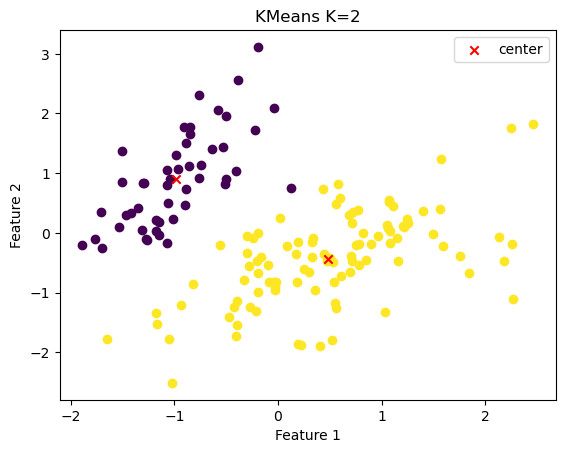

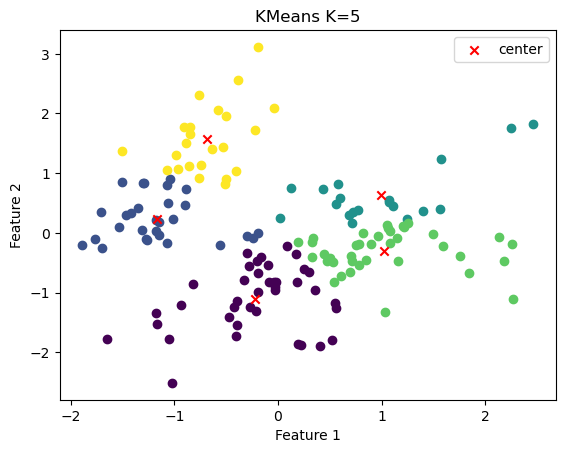

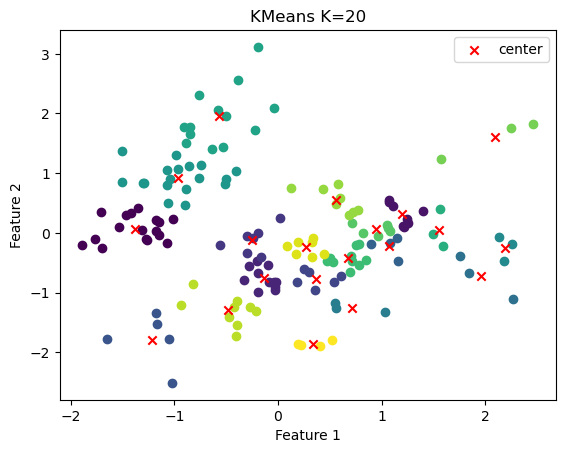

In [13]:
for k_best in k_best_scores:
    k, z, c = k_best['k'], k_best['z'], k_best['c']
    _, ax = plt.subplots()
    ml.plotClassify2D(None, X, z, axis=ax)
    cx, cy = c[:, 0], c[:, 1]
    ax.scatter(cx, cy, marker="x", color='r', label='center', zorder=20)
    ax.set_title(f'KMeans K={k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.plot()


### 1.3
- Run agglomerative clustering on the data, using single_linkage and then again using complete linkage, each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py).
- Again, plot with color the final assignment of the clusters. (This algorithm has no initialization issues; so you do not have to try multiple initializations.)

single linkage (method = 'min'), complete linkage (method = 'max')

In [14]:
K_parameters = [2, 5, 20]
agg_models = []
for k in K_parameters:
        methods = ['min', 'max']
        for method in methods:
                z, join = ml.cluster.agglomerative(X, K=k, method=method)
                agg_model = {
                        'k' : k,
                        'method': method,
                        'z': z,
                        'join': join
                }
                agg_models.append(agg_model)

In [15]:
agg_models_single_linkage = [agg_model for agg_model in agg_models if agg_model['method'] == 'min']
agg_models_complete_linkage = [agg_model for agg_model in agg_models if agg_model['method'] == 'max']

single linkage plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


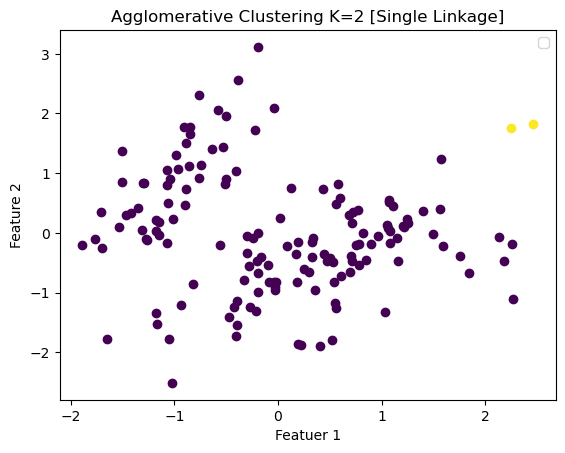

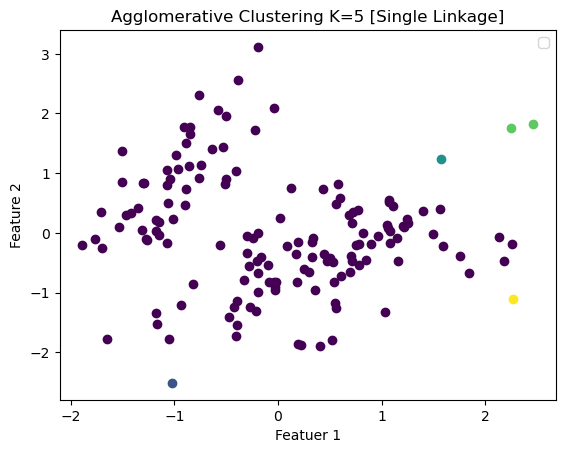

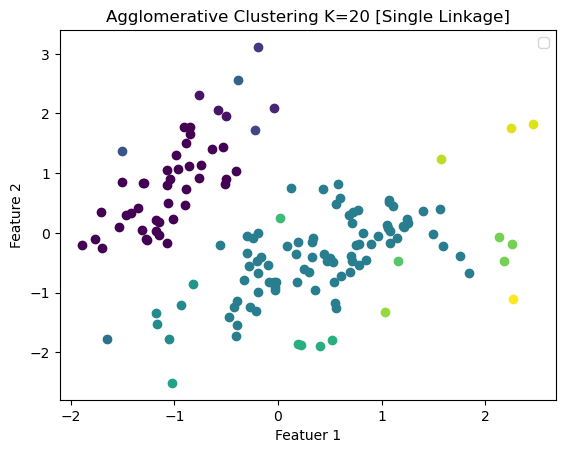

In [16]:
for agg_model in agg_models_single_linkage:
    k, z = agg_model['k'], agg_model['z']
    _, ax = plt.subplots()
    ml.plotClassify2D(None, X, z, axis=ax)
    ax.set_title(f'Agglomerative Clustering K={k} [Single Linkage]')
    ax.set_xlabel('Featuer 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.plot()

complete linkage plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


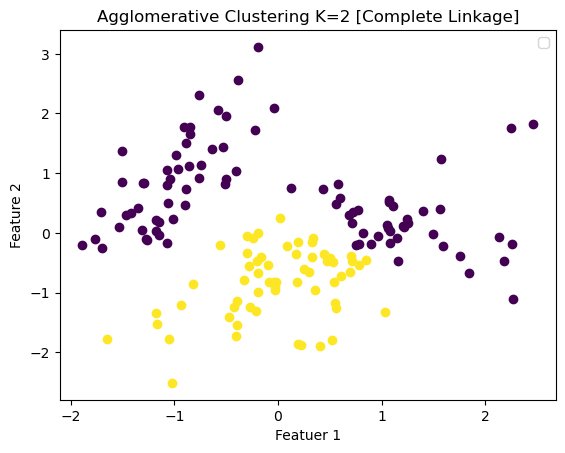

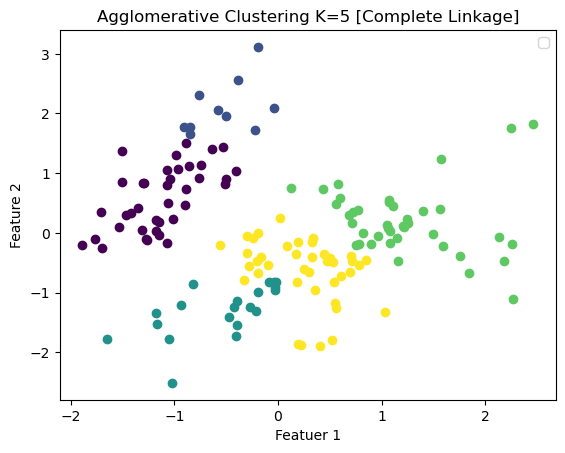

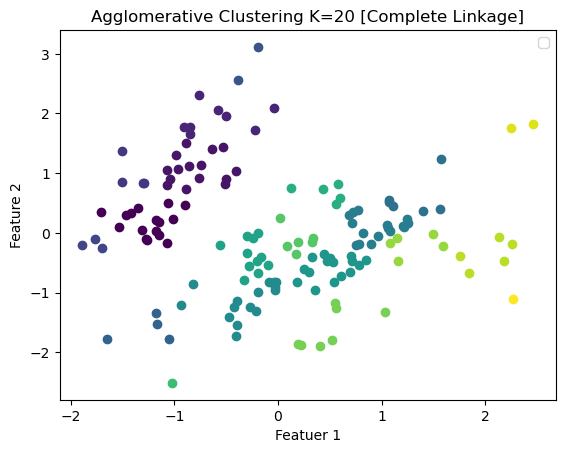

In [17]:
for agg_model in agg_models_complete_linkage:
    k, z = agg_model['k'], agg_model['z']
    _, ax = plt.subplots()
    ml.plotClassify2D(None, X, z, axis=ax)
    ax.set_title(f'Agglomerative Clustering K={k} [Complete Linkage]')
    ax.set_xlabel('Featuer 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.plot()

### 1.4
- Describe similarities and differences in the results from the agglomerative clustering and k-means.

The agglomerative clustering results with single linkage produced elongated clusters which is expected. These elongated clusters seem effective when setting K = 2, but the elongated clusters for single linkage seem less effective when there are high levels of K. This makes sense because single linkage is sensitive to outliers. At K = 2 and K = 5, the complete linkage and KMeans results are most similar which makes sense because complete linkage tends to produce spherical clusters and there appears to be 2 or 5 spherical clusters when splitting the data into 2 or 5 groups. These 2 and 5 groups are relatively dense and so that is why KMeans produced similar results at K=2 and K=5. At K=20, the single linkage and complete linkage results are most similar, while KMeans is very different than them. It makes sense at K=20, the agglomerative results are similar because single linkage became a lot less sensitive to outliers when there are many K clusters, thus producing similar results to complete linkage. The KMeans algorithm produce dispered clusters throughout the data points at K=20.

## 2. EigenFaces

Load the data and display a few samples of the faces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import mltools as ml

In [2]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset

In [3]:
X.shape

(4916, 576)

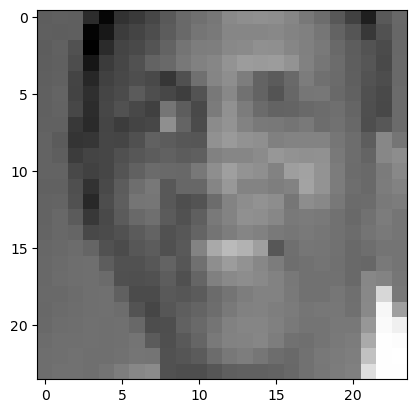

In [4]:
plt.figure()
# a data point (i = 8) for display
img = np.reshape(X[8,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

### 2.1
- Subtract the mean of the face images (X0 = X − μ) to make your data zero-mean. (The mean should be of
the same dimension as a face, 576 pixels.)
- Plot the mean face.

In [7]:
mu_X = np.mean(X, axis=0, keepdims=True) # find mean over data points
X_0 = X - mu_X # zero-center the data

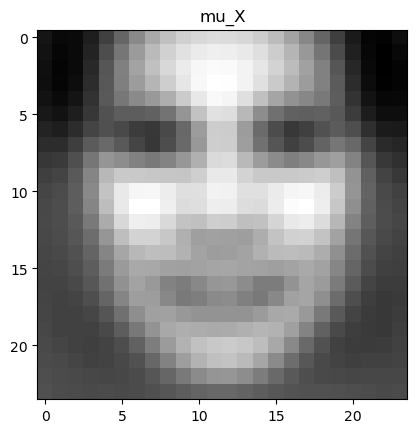

In [17]:
img = np.reshape(mu_X, (24,24))
fig, ax = plt.subplots()
ax.set_title('mu_X')
ax.imshow( img.T , cmap="gray") # display image patch; you may have to squint

### 2.2
- Use scipy.linalg.svd to take the SVD of the data, so that

$$ X_0 = U * diag(S) * V_h $$

In [18]:
# least-squares approximation to X

# U * diag(S) * V_h = X_0 
# U = matrix of left singular vectors (capture the variation in the original features of the data)
# S = diagonal matrix of singular values
# V = matrix of right singular vectors (capture the variation in the samples of the data)
U, S, V_h = scipy.linalg.svd(X_0, full_matrices=False) # full_matrices=False to avoid using a lot of memory

In [19]:
U.shape, S.shape, V_h.shape

((4916, 576), (576,), (576, 576))

Computing the compact SVD, W, by W = U.dot( np.diag(S) ) so that

$$ X_0 \approx W * V_h $$

In [20]:
# W = a matrix whose columns represent the most important directions in the row space
# of the original matrix, weighted by their importance (singular values)

W = U.dot( np.diag(S) )

# V is used later to reconstruct the original data from lower dimensional representation

Print the shapes of $W$ and $V_h$

In [21]:
W.shape, V_h.shape

((4916, 576), (576, 576))

### 2.3
- For $K$ = 1...10, compute the approximation to $X_0$ given by the first $K$ eigendirections, e.g.,
$$ \hat{X}_0 = W[:,: K] * V_h[: K, :] $$
- Use them to computer the mean squared error in the SVD's approximation, $np.mean( (X_0 - \hat{X}_0 ) ** 2)$
- Plot the MSE values as a function of $K$.

In [22]:
mse_values = []

for K in range(1, 11):
        # compute approximation to X_0 given by first K (10) eigendirections
        X_0_hat = W[:, :K].dot( V_h[:K, :] )
        X_0_hat.shape

        # computer MSE in the SVD's approximiation
        mse = np.mean((X_0 - X_0_hat) ** 2)

        mse_values.append(mse)

Text(0, 0.5, 'MSE')

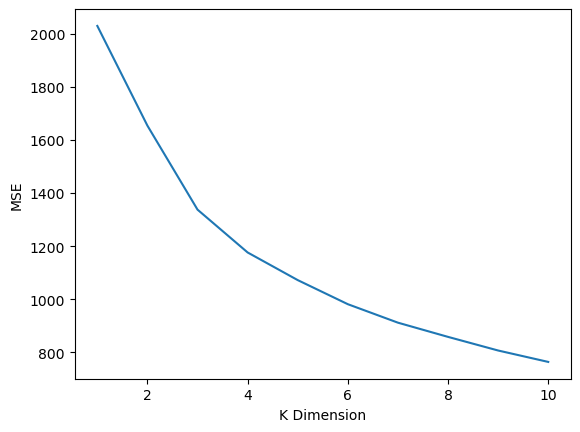

In [23]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 11), mse_values)

ax.set_xlabel('K Dimension')
ax.set_ylabel('MSE')

### 2.4
- Display the first three principal directions of the data, by computing μ+α V[j,:] and μ-α V[j,:], where α is a scale factor (we suggest, for example, 2*np.median(np.abs(W[:,j])), to get a sense of the scale found in the data).
- These should be vectors of length 242 = 576, so you can reshape them and view them as “face images” just like the original data. They should be similar to the images in lecture.

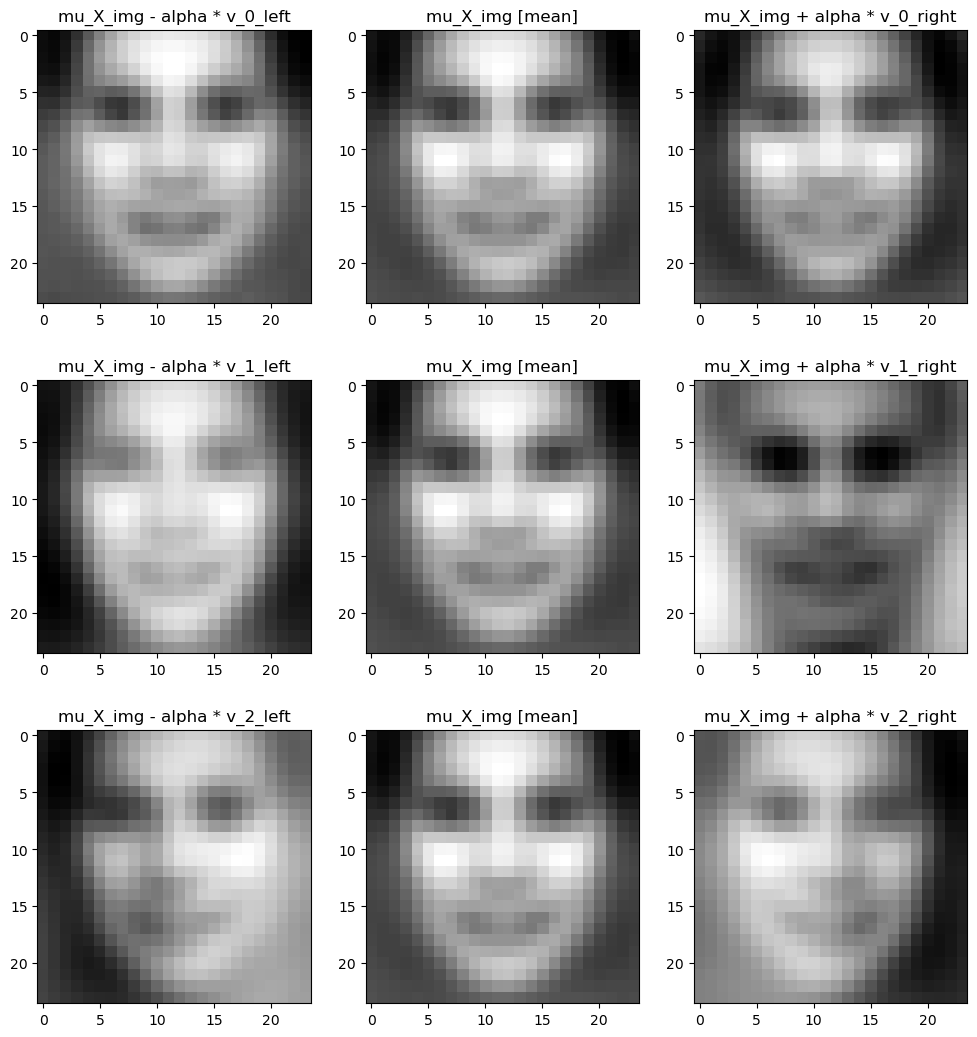

<Figure size 640x480 with 0 Axes>

In [89]:
# Notes for myself

# V_h (matrix of right singular vectors) is used to represent
# the principal (direction of maximum variation) directions of image data
# bc they correspond to the patterns of variation across different images

# Scaling factor - represents the amount of variance explained by a j singular vector

# Display the first 3 priniciple directions of the data
mu_X_img = np.reshape(mu_X, (24,24))
f, ax = plt.subplots(3, 3, figsize=(12, 15))
plt.subplots_adjust(bottom=0.3, top=1, hspace=0)
plt.figure()

for j in range(3):

        # alpha is the scale factor
        alpha = 2 * np.median(np.abs(W[:,j]))

        v_j_img = np.reshape(V_h[j,:],(24,24)) # convert vectorized data to 24x24 image patches        
        
        v_j_left = mu_X_img - alpha * v_j_img
        ax[j][0].imshow(v_j_left.T, cmap="gray")
        ax[j][0].set_title(f'mu_X_img - alpha * v_{j}_left')

        ax[j][1].imshow(mu_X_img.T, cmap="gray")
        ax[j][1].set_title(f'mu_X_img [mean]')

        v_j_right = mu_X_img + alpha * v_j_img
        ax[j][2].imshow(v_j_right.T , cmap="gray")
        ax[j][2].set_title(f'mu_X_img + alpha * v_{j}_right')
        
plt.tight_layout(pad=0)
plt.show()

### 2.5
- Choose any two faces and reconstruct them using the first K principal directions, for K = 5, 10, 50, 100.

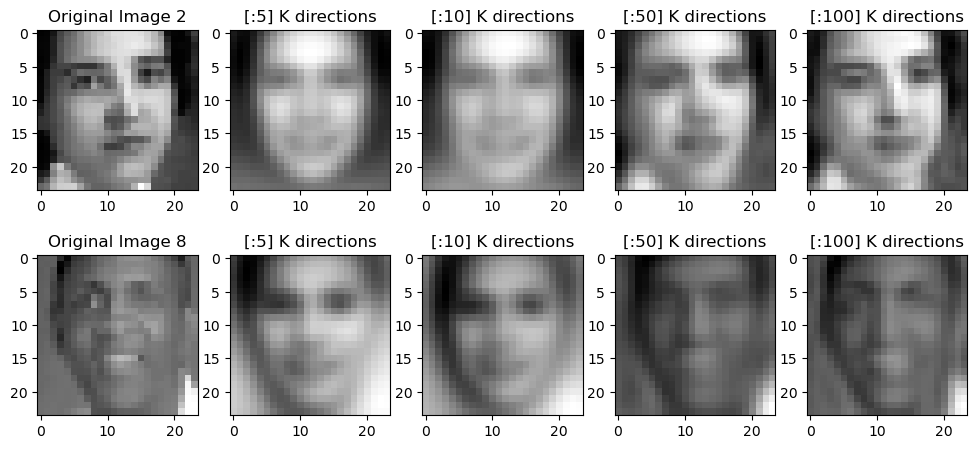

<Figure size 640x480 with 0 Axes>

In [85]:
k_directions = [5,10,50,100]
face_indicies = [2,8]

f, ax = plt.subplots(2, 5, figsize=(12, 15))
plt.subplots_adjust(bottom=0.3, top=0.6, hspace=0)
plt.figure()


for j in range(len(face_indicies)):
        i = face_indicies[j]

        # original image
        img_i_og= np.reshape(X[i,:], (24,24))
        ax[j][0].imshow(img_i_og.T, cmap="gray")
        ax[j][0].set_title(f'Original Image {i}')
        
        for col_i, k in enumerate(k_directions):
                # reconstructed image
                X_i_rec = np.dot(W[i, :k], V_h[:k]) + mu_X
                img_i_rec= np.reshape(X_i_rec, (24,24))
                ax[j][col_i + 1].imshow(img_i_rec.T, cmap="gray")
                ax[j][col_i + 1].set_title(f'[:{k}] K directions')

plt.tight_layout(pad=0)
plt.show()

### 2.6
- Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as a new geometric space in which the data are being described.
- To visualize this, choose a few faces (say 25), and display them as images with the coordinates given by their coefficients on the first two principal components:

In [110]:
SEED = 0
np.random.seed(SEED)
idxs = []
while len(idxs) != 25:
        i = np.random.randint(0, X.shape[0])
        if i not in idxs:
                idxs.append(i)
len(idxs), idxs[0:4]

(25, [2732, 2607, 1653, 3264])

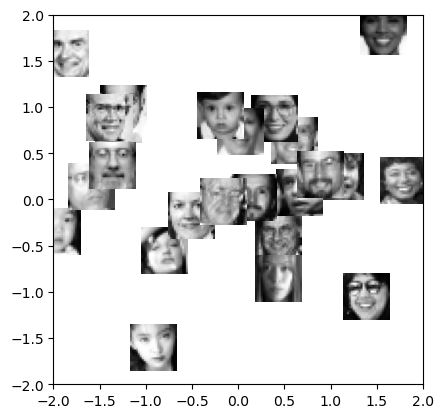

In [113]:
coord, params = ml.transforms.rescale( W[:, 0:2] ) # normalize scale of "W" locations (first 2 principle components)

plt.figure()

for i in idxs:
        # compute where to place image (scaled W values) & size
        loc = (coord[i, 0],coord[i, 0] + 0.5, coord[i,1], coord[i, 1] + 0.5)
        img = np.reshape( X[i,:], (24,24) ) # reshape to square
        plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
        plt.axis( (-2, 2, -2, 2) ) # set axis to a reasonable scale